In [2]:
using PyPlot, Interact

In [3]:
linspace(a,b,n) = LinRange(a,b,n) |> collect

linspace (generic function with 1 method)

In [4]:
βa(x)=x*(1-tan(x)/x)
ϵ = 0.01
function boundStates(x,ϵ)
    betaa=βa.(x)
    x1=minimum(x)
    x2=maximum(x)
    dx=x[2]-x[1]
    n1 = 0
    n2 = ceil(0.5*(2*x2/π-1))
    n = collect(n1:n2)
    xbs = (1 .+2*n)π/2
    for j in 1:length(xbs)
        i = findall(abs.(x .-xbs[j]).<ϵ)
        betaa[i] .= NaN
    end
    return betaa,xbs 
end

boundStates (generic function with 1 method)

In [5]:
βb = linspace(0,10,500)
bs,xbs = boundStates(βb,ϵ)

([NaN, -2.68316e-6, -2.14756e-5, -7.25386e-5, -0.000172137, -0.000336694, -0.000582841, -0.000927478, -0.00138783, -0.0019815  …  9.40289, 9.39921, 9.3951, 9.39055, 9.3855, 9.37993, 9.3738, 9.36707, 9.3597, 9.35164], [1.5708, 4.71239, 7.85398, 10.9956])

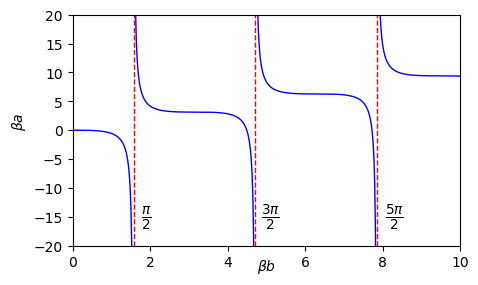

In [6]:
f1=figure(figsize=(5,3))
plot(βb,bs,color="blue",linewidth=1)
ylim([-20,20])
xlim([0,10])
xlabel(L"βb",va="bottom")
ylabel(L"\beta a",ha="left");

ybs = linspace(-20,20,length(βb))
plot(xbs[1]*one.(βb),ybs,"--",color="red",linewidth=1);
plot(xbs[2]*one.(βb),ybs,"--",color="red",linewidth=1);
plot(xbs[3]*one.(βb),ybs,"--",color="red",linewidth=1);
 annotate(L"$\frac{\pi}{2}$",xy=[.24;0],xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="right",
    va="bottom")
annotate(L"$\frac{3\pi}{2}$",xy=[.57;0],xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="right",
    va="bottom")
annotate(L"$\frac{5\pi}{2}$",xy=[.89;0],xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="right",
    va="bottom")
savefig("boundState.pdf")

In [7]:
rm = 8
r = linspace(0,rm,500);

In [8]:
function kcotd(k,b,β)
    q=sqrt(k^2+β^2)
    return (q*cot(q*b)+k*tan(k*b))/(1-(q/k)*cot(q*b)*tan(k*b))
end

function u1(r,β,b,k)
    q=sqrt(k^2+β^2)
    return sin.(q*r)
end

function u2(r,β,b,k,δ₀)
    q=sqrt(k^2+β^2)
    return sin.(q*b)/sin.(k*b+δ₀).*sin.(k*r+δ₀)
end

d0(k,b,β)=acot(k^(-1)*kcotd(k,b,β))
δ0(k,b,β)=acot(-β./βa.(β*b)./k)

δ0 (generic function with 1 method)

In [9]:
b=1.
β=4.8
k=.1
d0(k,b,β),δ0.(k,b,β)
#slope(k,b,β)=b*sin.(sqrt(k^2+β^2)*b)/sin.(k*b+d0.(k,b,β)).*cos.(k*b+d0.(k,b,β))

(-0.3301797218454307, -0.3252128648152702)

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:k=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
74,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.05", "0.07", "0.09", "0.11", "0.13", "0.15", "0.17", "0.19", "0.21", "0.23"  …  "2.81", "2.83", "2.85", "2.87", "2.89", "2.91", "2.93", "2.95", "2.97", "2.99"],:formatted_value=>Observable{String} with 1 listeners. Value:
"1.51",:value=>Observable{Float64} with 2 listeners. Value:
1.51), Observable{Float64} with 2 listeners. Value:
1.51, Scope("knockout-component-53361f1a-bb98-4734-982e-6583a92eff97", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>148,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.05", "0.07", "0.09", "0.11", "0.13", "0.15", "0.17", "0.19", "0.21", "0.23"  …  "2.81", "2.83", "2.85", "2.87", "2.89", "2.91", "2.93", "2.95", "2.97", "2.99"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"1.51", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
74, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/abradley/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/abradley/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/abradley/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/abradley/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/abradley/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.05\\\",\\\"0.07\\
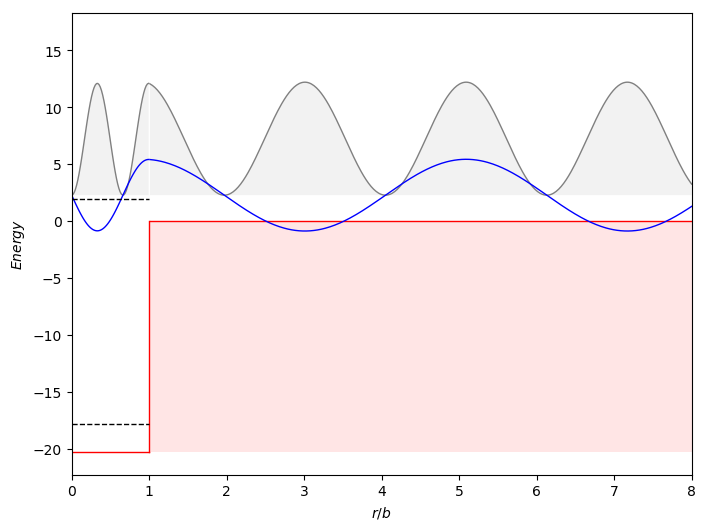
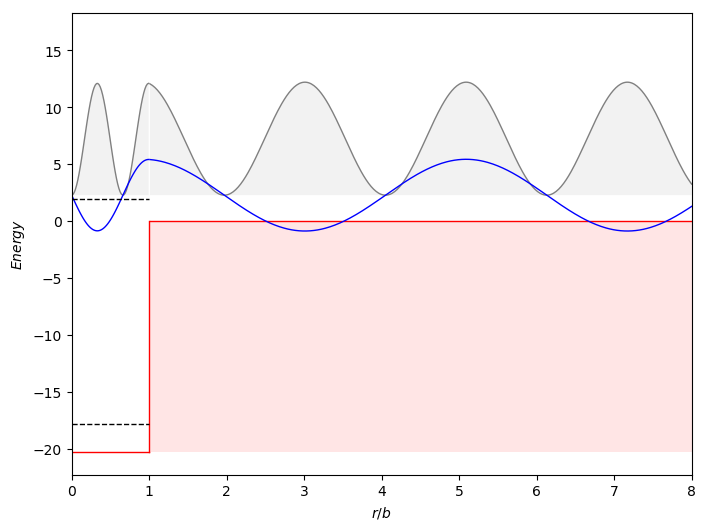

In [30]:
f1= figure(figsize=(8,6))
@manipulate for k=0.05:0.02:3.0, β=.5:.1:5.5*pi/2 
    withfig(f1,clear=true) do

#draw potential
i = findall(r.<1)
j = findall(r.>1)
rb = r[i]
rc = r[j]
l1 = -β^2*one.(rb)
l2 = linspace(-β^2,0,100)
l3 = zero.(rc)
l4 = zero.(rb)
l5 = -β^2*one.(rc)
plot(rb,l1,color="red",linewidth=1)
plot(one.(l2),l2,color="red",linewidth=1)
plot(rc,l3,color="red",linewidth=1)
amp = .7*β*sin.(k*b .+d0(k,b,β))/sin.(sqrt.(k^2 .+β^2)*b)
#amp = 1
#draw wavefunction
y1=k.^2 .+amp^2*abs2.(u1.(rb,β,b,k)) 
y2=k.^2 .+amp^2*abs2.(u2.(rc,β,b,k,d0.(k,b,β))) 
y3=k.^2 .+amp*u1.(rb,β,b,k)
y4=k.^2 .+amp*u2.(rc,β,b,k,d0.(k,b,β))
plot(rb,y1,color="gray",linewidth=1)
plot(rc,y2,color="gray",linewidth=1,alpha=1)
plot(rb,y3,color="blue",linewidth=1)
plot(rc,y4,color="blue",linewidth=1)
fill_between(rc, l3 .+k^2,y2, l3.<y2 , facecolor="gray",alpha=.1)
fill_between(rb, l4 .+k^2,y1, l4.<y1 , facecolor="gray",alpha=.1)
fill_between(rc, l5,l3, l5.<l3 , facecolor="red",alpha=.1)
        ymax2=maximum(y2)
        ymax4=maximum(y4)
        ymin4=minimum(y4)
        yminU=-β^2
        #ymin=minimum([ymin4,yminU])
        ymin = yminU
        ymax=maximum([ymax2,ymax4])
ylim([1.1*ymin,1.5*ymax2])
xlim([0,rm])
xlabel(L"r/b")
ylabel(L"Energy");

#draw bound state energies
        nmax = ceil(0.5*(2*β/π-1))
        #show(nmax)
        n = 0:nmax
        eb = (2*n .+1)π/2
        bline=one.(rb)
        for j=1:length(eb)
            plot(rb,l1 .+eb[j].^2,color="black",linewidth=1,linestyle=:dashed);
        end
        #plot bound states
        j=findall(eb.^2 .<β^2);
        ebn=eb[j];
        for i=1:length(ebn)
            z1 = l1 .+ebn[i].^2 .+amp^2*abs2.(u1.(rb,im*β,b,k))
            z2 = l5 .+ebn[i].^2 .+amp^2*abs2.(u2.(rc,im*β,b,k,d0.(k,b,im*β)))
            #plot(rb,z1)
        end
    end
end

In [11]:
k=0.33
β=4.7
β=4
β=4.8

4.8

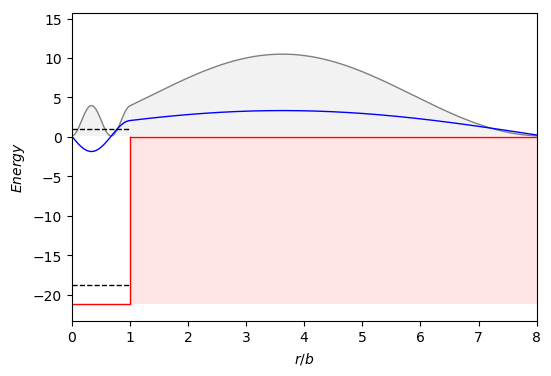

In [12]:
f1= figure(figsize=(6,4))
k=0.35
β=4.6

#draw potential
i = findall(r.<1)
j = findall(r.>1)
rb = r[i]
rc = r[j]
l1 = -β^2*one.(rb)
l2 = linspace(-β^2,0,100)
l3 = zero.(rc)
l4 = zero.(rb)
l5 = -β^2*one.(rc)
plot(rb,l1,color="red",linewidth=1)
plot(one.(l2),l2,color="red",linewidth=1)
plot(rc,l3,color="red",linewidth=1)
amp = .7*β*sin.(k*b .+d0(k,b,β))./sin.(sqrt.(k^2 .+β^2)*b)
#amp = 1
#draw wavefunction
y1=k.^2 .+amp^2*abs2.(u1.(rb,β,b,k))
y2=k.^2 .+amp^2*abs2.(u2.(rc,β,b,k,d0.(k,b,β)))
y3=k.^2 .+amp*u1.(rb,β,b,k)
y4=k.^2 .+amp*u2.(rc,β,b,k,d0.(k,b,β))
plot(rb,y1,color="gray",linewidth=1)
plot(rc,y2,color="gray",linewidth=1,alpha=1)
plot(rb,y3,color="blue",linewidth=1)
plot(rc,y4,color="blue",linewidth=1)
fill_between(rc, l3.+k^2,y2, l3.<y2 , facecolor="gray",alpha=.1)
fill_between(rb, l4.+k^2,y1, l4.<y1 , facecolor="gray",alpha=.1)
fill_between(rc, l5,l3, l5.<l3 , facecolor="red",alpha=.1)
        ymax2=maximum(y2)
        ymax4=maximum(y4)
        ymin4=minimum(y4)
        yminU=-β^2
        #ymin=minimum([ymin4,yminU])
        ymin = yminU
        ymax=maximum([ymax2,ymax4])
ylim([1.1*ymin,1.5*ymax2])
xlim([0,rm])
xlabel(L"r/b")
ylabel(L"Energy");

#draw bound state energies
        nmax = ceil(0.5*(2*β/π-1))
        #show(nmax)
        n = 0:nmax
        eb = (2*n.+1)π/2
        bline=one.(rb)
        for j=1:length(eb)
        plot(rb,l1 .+eb[j].^2,color="black",linewidth=1,linestyle=:dashed);
        end
        #plot bound states
        j=findall(eb.^2 .<β^2);
        ebn=eb[j];
        for i=1:length(ebn)
            z1 = l1 .+ebn[i].^2 .+amp^2*abs2.(u1.(rb,im*β,b,k))
            z2 = l5 .+ebn[i].^2 .+amp^2*abs2.(u2.(rc,im*β,b,k,d0.(k,b,im*β)))
            #plot(rb,z1)
        end
savefig("bs1.pdf")

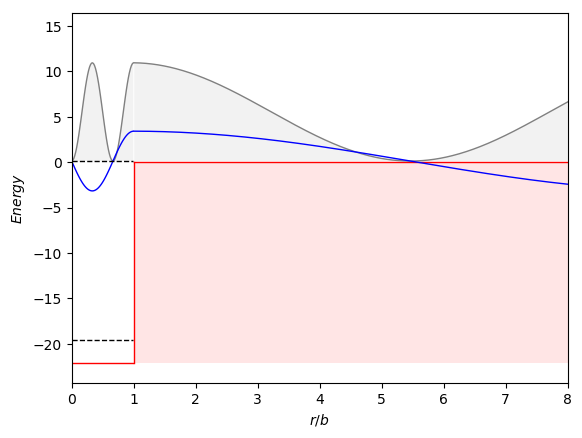

In [24]:
k=0.35
β=4.7

#draw potential
i = findall(r .<1)
j = findall(r .>1)
rb = r[i]
rc = r[j] 
l1 = -β^2*one.(rb)
l2 = linspace(-β^2,0,100)
l3 = zero.(rc)
l4 = zero.(rb)
l5 = -β^2*one.(rc)
plot(rb,l1,color="red",linewidth=1)
plot(one.(l2),l2,color="red",linewidth=1)
plot(rc,l3,color="red",linewidth=1)
amp = .7*β*sin.(k*b .+d0(k,b,β))/sin.(sqrt.(k^2 .+β^2)*b)
#amp = 1
#draw wavefunction
y1=k.^2 .+amp^2*abs2.(u1.(rb,β,b,k))
y2=k.^2 .+amp^2*abs2.(u2.(rc,β,b,k,d0.(k,b,β)))
y3=k.^2 .+amp*u1.(rb,β,b,k)
y4=k.^2 .+amp*u2.(rc,β,b,k,d0.(k,b,β))
plot(rb,y1,color="gray",linewidth=1)
plot(rc,y2,color="gray",linewidth=1,alpha=1)
plot(rb,y3,color="blue",linewidth=1)
plot(rc,y4,color="blue",linewidth=1)
fill_between(rc, l3 .+k^2,y2, l3 .<y2 , facecolor="gray",alpha=.1)
fill_between(rb, l4 .+k^2,y1, l4 .<y1 , facecolor="gray",alpha=.1)
fill_between(rc, l5,l3, l5 .<l3 , facecolor="red",alpha=.1)
        ymax2=maximum(y2)
        ymax4=maximum(y4)
        ymin4=minimum(y4)
        yminU=-β^2
        #ymin=minimum([ymin4,yminU])
        ymin = yminU
        ymax=maximum([ymax2,ymax4])
ylim([1.1*ymin,1.5*ymax2])
xlim([0,rm])
xlabel(L"r/b")
ylabel(L"Energy");

#draw bound state energies
        nmax = ceil(0.5*(2*β/π-1))
        #show(nmax)
        n = 0:nmax
        eb = (2*n .+1)π/2
        bline=one.(rb)
        for j=1:length(eb)
        plot(rb,l1 .+eb[j].^2,color="black",linewidth=1,linestyle=:dashed);
        end
        #plot bound states
        j=findall(eb.^2 .<β^2);
        ebn=eb[j];
        for i=1:length(ebn)
            z1 = l1 .+ebn[i].^2 .+amp^2*abs2.(u1.(rb,im*β,b,k))
            z2 = l5 .+ebn[i].^2 .+amp^2*abs2.(u2.(rc,im*β,b,k,d0.(k,b,im*β)))
            #plot(rb,z1)
        end
savefig("bs2.pdf")

In [25]:
x = [0.1 0.0]
zero.(x)

1×2 Array{Float64,2}:
 0.0  0.0

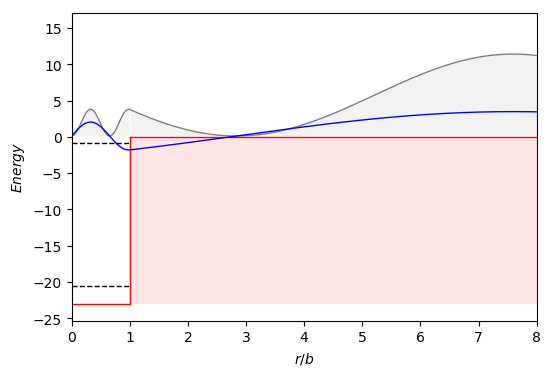

In [29]:
f1= figure(figsize=(6,4))
k=0.33
β=4.8

#draw potential
i = findall(r .<1)
j = findall(r .>1)
rb = r[i]
rc = r[j]
l1 = -β^2*one.(rb)
l2 = linspace(-β^2,0,100)
l3 = zero.(rc)
l4 = zero(rb)
l5 = -β^2*one.(rc)
plot(rb,l1,color="red",linewidth=1)
plot(one.(l2),l2,color="red",linewidth=1)
plot(rc,l3,color="red",linewidth=1)
amp = .7*β*sin.(k*b .+d0(k,b,β))/sin.(sqrt(k^2 .+β^2)*b)
#amp = 1
#draw wavefunction
y1=k.^2 .+amp^2*abs.(u1.(rb,β,b,k)).^2
y2=k.^2 .+amp^2*abs.(u2.(rc,β,b,k,d0.(k,b,β))).^2
y3=k.^2 .+amp*u1.(rb,β,b,k)
y4=k.^2 .+amp*u2.(rc,β,b,k,d0.(k,b,β))
plot(rb,y1,color="gray",linewidth=1)
plot(rc,y2,color="gray",linewidth=1,alpha=1)
plot(rb,y3,color="blue",linewidth=1)
plot(rc,y4,color="blue",linewidth=1)
fill_between(rc, l3 .+k^2,y2, l3 .<y2 , facecolor="gray",alpha=.1)
fill_between(rb, l4 .+k^2,y1, l4 .<y1 , facecolor="gray",alpha=.1)
fill_between(rc, l5,l3, l5 .<l3 , facecolor="red",alpha=.1)
        ymax2=maximum(y2)
        ymax4=maximum(y4)
        ymin4=minimum(y4)
        yminU=-β^2
        #ymin=minimum([ymin4,yminU])
        ymin = yminU
        ymax=maximum([ymax2,ymax4])
ylim([1.1*ymin,1.5*ymax2])
xlim([0,rm])
xlabel(L"r/b")
ylabel(L"Energy");

#draw bound state energies
        nmax = ceil(0.5*(2*β/π-1))
        n = 0:nmax
        eb = (2*n .+1)π/2
        bline=one.(rb)
        for j=1:length(eb)
        plot(rb,l1 .+eb[j].^2,color="black",linewidth=1,linestyle=:dashed);
        end
        #plot bound states
        j=findall(eb.^2 .<β^2);
        ebn=eb[j];
        for i=1:length(ebn)
            z1 = l1 .+ebn[i].^2 .+amp^2*abs.(u1.(rb,im*β,b,k)).^2
            z2 = l5 .+ebn[i].^2 .+amp^2*abs.(u2.(rc,im*β,b,k,d0.(k,b,im*β))).^2
            #plot(rb,z1)
        end
#savefig("bs3.pdf")